In [ ]:
!pip3 install fuzzywuzzy
!pip3 install Levenshtein

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations
from fuzzywuzzy import fuzz
from Levenshtein import distance  # Import adăugat
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/title.csv')

In [ ]:
if 'text' not in df.columns:
    print("Eroare în fișierul CSV.")
else:
    with open('/content/drive/My Drive/similarity_results.csv', 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['text1', 'text2', 'similaritate_cosinus', 'similaritate_fuzz_ratio', 'similaritate_jaccard', 'distanta_levenshtein'])

        # Creează vectori TF-IDF pentru textele din dataframe
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform(df['text'])

        # Calculează similaritatea cosinusului, similitudinea fuzz.ratio, similitudinea Jaccard și distanța Levenshtein între perechile de texte
        for pair in combinations(range(len(df['text'])), 2):
            text1, text2 = pair
            cosine_sim = cosine_similarity(vectors[text1], vectors[text2])[0][0]
            fuzz_ratio = fuzz.ratio(df['text'][text1], df['text'][text2])

            set1 = set(df['text'][text1].split())
            set2 = set(df['text'][text2].split())
            jaccard_similarity = len(set1.intersection(set2)) / len(set1.union(set2))

            levenshtein_distance = distance(df['text'][text1], df['text'][text2])

            csv_writer.writerow([df['text'][text1], df['text'][text2], cosine_sim, fuzz_ratio, jaccard_similarity, levenshtein_distance])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


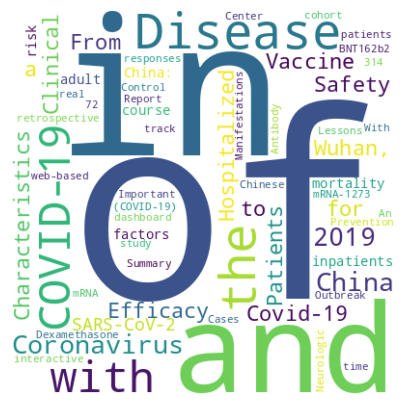

Norul de cuvinte a fost creat și salvat în '/content/drive/My Drive/frecventa_cuvinte.csv'.


In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import csv
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# 1: Citim conținutul fișierului text
file_path = '/content/drive/My Drive/title.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text_content = file.read()

#  2: Tokenizăm textul în cuvinte
words = text_content.split()

#  3: Calculăm frecvența de apariție a fiecărui cuvânt
word_frequency = Counter(words)

#print(stopwords.words('english'))
stop_words = set(stopwords.words('english'))
text=' '.join(words)
#  4: Creăm un nor de cuvinte cu doar cele mai frecvente 50 de cuvinte
wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=100, stopwords=stop_words).generate_from_frequencies(word_frequency)

# Vizualizăm norul de cuvinte
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Pasul 5: Salvăm rezultatele într-un fișier CSV
csv_file_path = '/content/drive/My Drive/frecventa_cuvinte.csv'
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Cuvant', 'Frecventa'])
    for word, frequency in word_frequency.most_common(50):
        csv_writer.writerow([word, frequency])

print(f"Norul de cuvinte a fost creat și salvat în '{csv_file_path}'.")